# Python Group Assignment-2 (Group Code: G2B4)

## Business Context:

### Customer segmentation is one of the most important marketing tools at your disposal, because it can help a business to better understand its target audience. This is because it groups customers based on common characteristics.


### Segmentation can be based on the customer’s habits and lifestyle, in particular, their buying habits. Different age groups, for example, tend to spend their money in different ways, so brands need to be aware of who exactly is buying their product. 

### Segmentation also focuses more on the personality of the consumer, including their opinions, interests, reviews, and rating. Breaking down a large customer base into more manageable clusters, making it easier to identify your target audience and launch campaigns and promote the business to the most relevant people.

## Dataset Description:

### The dataset contains measurements of clothing fit from RentTheRunway. RentTheRunWay is a unique platform that allows women to rent clothes for various occasions. The collected data is of several categories. This dataset contains self-reported fit feedback from customers as well as other side information like reviews, ratings, product categories, catalog sizes, customers’ measurements (etc.)

## Data Citation:

### ● Rishabh Misra, Mengting Wan, Julian McAuley "Decomposing Fit Semantics for Product Size Recommendation in Metric Spaces". RecSys, 2018.
### ● Rishabh Misra, Jigyasa Grover "Sculpting Data for ML: The first act of Machine Learning". 2021.

## Project Objective:

### Based on the given users and items data of an e-commerce company, segment the similar user and items into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

# Import the required libraries and load the data: [ Score: 3 point ]

## 1. Load the required libraries and read the dataset. (1)

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer

In [2]:
# Reading the csv file 

df = pd.read_csv('renttherunway.csv')
df.head(3)


,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"


## 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features

In [3]:
# Checking first few samples

df.sample(5)


,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
74985,74985,fit,32925,34b,529029,122lbs,10.0,wedding,"Luxurious silky material and a beautiful, uniq...",straight & narrow,RTR Team Review!,gown,"5' 7""",4,26.0,"June 7, 2016"
127106,127106,fit,272037,32d,263699,130lbs,10.0,formal affair,Loved the dress. The fit was easy (except for...,hourglass,Great dress - tons of compliments.,dress,"5' 4""",1,41.0,"April 26, 2017"
38484,38484,fit,685145,NaN,1064397,NaN,10.0,party,I rented this dress for my fiance's holiday wo...,NaN,perfect fit-- extremely flattering and great f...,gown,"6' 0""",13,28.0,"January 28, 2016"
126887,126887,fit,949898,34aa,149739,120lbs,10.0,formal affair,"It was slimming - it's snug, but not uncomfort...",straight & narrow,Everyone loved this dress I wore to a black ti...,gown,"5' 6""",5,29.0,"September 24, 2012"
25966,25966,fit,220203,32b,2821045,114lbs,10.0,date,Really loved this. Unfortunately I was unable ...,athletic,Cute and effortless,romper,"5' 4""",8,34.0,"March 6, 2015"


In [4]:
# Checking shape of the dataset

df.shape

(192544, 16)

In [5]:
# Checking the dataset info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      192544 non-null  int64  
 1   fit             192544 non-null  object 
 2   user_id         192544 non-null  int64  
 3   bust size       174133 non-null  object 
 4   item_id         192544 non-null  int64  
 5   weight          162562 non-null  object 
 6   rating          192462 non-null  float64
 7   rented for      192534 non-null  object 
 8   review_text     192476 non-null  object 
 9   body type       177907 non-null  object 
 10  review_summary  192197 non-null  object 
 11  category        192544 non-null  object 
 12  height          191867 non-null  object 
 13  size            192544 non-null  int64  
 14  age             191584 non-null  float64
 15  review_date     192544 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 23.5+ 

# Data cleansing and Exploratory data analysis: [ Score: 20 point ]

## 3. Check if there are any duplicate records in the dataset? If any, drop them.(1)

In [6]:
# Checking for duplicated records

len(df[df.duplicated()])


0

## 4. Drop the columns which you think redundant for the analysis.(Hint: drop columns like ‘id’, ‘review’) (1)

In [7]:
# dropping columns like id & review

df = df.drop(['Unnamed: 0', 'user_id','review_text','review_summary', 'review_date', 'item_id'], axis=1)
df.head(5)

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,137lbs,10.0,vacation,hourglass,romper,"5' 8""",14,28.0
1,fit,34b,132lbs,10.0,other,straight & narrow,gown,"5' 6""",12,36.0
2,fit,NaN,NaN,10.0,party,NaN,sheath,"5' 4""",4,116.0
3,fit,34c,135lbs,8.0,formal affair,pear,dress,"5' 5""",8,34.0
4,fit,34b,145lbs,10.0,wedding,athletic,gown,"5' 9""",12,27.0


## 5. Check the column 'weight', Is there any presence of string data? If yes, remove the string data and convert to float. (Hint: 'weight' has the suffix as lbs) (2)

In [8]:
df['weight'].dtypes

dtype('O')

In [10]:
df['weight'] = df['weight'].str.replace('lbs','')
df['weight'] = df['weight'].astype(float)
df['weight'].head()

0    137.0
1    132.0
2      NaN
3    135.0
4    145.0
Name: weight, dtype: float64

## 6. Check the unique categories for the column 'rented for' and group 'party: cocktail' category with 'party'. (2)

In [11]:
# Checking unique categories of the 'rented for' column

df['rented for'].unique()


array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan, 'party: cocktail'], dtype=object)

In [12]:

df['rented for'] = df['rented for'].replace('party: cocktail','party')

# Verify the changes

df['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan], dtype=object)

## 7. The column 'height' is in feet with a quotation mark, Convert to inches with float datatype. (3)

In [13]:


replace_dict = {"\'" : ".", " ": "", "\"": ""}
df['height'] = pd.to_numeric(df['height'].replace(replace_dict, regex=True))

df['height'].fillna( df['height'].median(), inplace=True )
df['height'].isna().sum()


df['height'] = df['height'].apply(lambda x: int(x) * 12) + df['height'].apply( lambda x: float( str(x).split(".")[1]) )
df['height']

0         68.0
1         66.0
2         64.0
3         65.0
4         69.0
          ... 
192539    69.0
192540    61.0
192541    68.0
192542    66.0
192543    66.0
Name: height, Length: 192544, dtype: float64

## 8. Check for missing values in each column of the dataset? If it exists, impute them with appropriate methods. (3)

In [14]:
# Checking the the missing values in all the columns

df.isna().sum()

fit               0
bust size     18411
weight        29982
rating           82
rented for       10
body type     14637
category          0
height            0
size              0
age             960
dtype: int64

In [15]:
# imputing na values in 'weight' column
df['weight'].fillna( df['weight'].median(), inplace=True )

# imputing na values in 'rating' column
df['rating'].fillna( df['rating'].median(), inplace=True )

# imputing na values in 'rented for' column

mode_value = ( df['rented for'].mode()[0] )
df['rented for'].fillna( mode_value, inplace=True )

# imputing na values in 'age' column

df['age'].fillna( df['age'].median(), inplace=True )

df['bust size'] = df['bust size'].fillna('NA')
df['body type'] = df['body type'].fillna('NA')

df.isna().sum()

## 'bust-size' & 'body type' columns have NA values in more than 5% of the records. Both are categorical columns.
## Hence any imputation technique may highly  influence the data set.

fit           0
bust size     0
weight        0
rating        0
rented for    0
body type     0
category      0
height        0
size          0
age           0
dtype: int64

## 9. Check the statistical summary for the numerical and categorical columns and write your findings. (3)

In [16]:
# numerical columns - statistical summary

print("\nStatistical Summary for Numerical Columns => ")
df.describe().T



Statistical Summary for Numerical Columns => 


,count,mean,std,min,25%,50%,75%,max
weight,192544.0,137.019284,20.141448,50.0,125.0,135.0,145.0,300.0
rating,192544.0,9.092758,1.429862,2.0,8.0,10.0,10.0,10.0
height,192544.0,64.970505,2.657680,49.0,63.0,65.0,67.0,78.0
size,192544.0,12.245175,8.494877,0.0,8.0,12.0,16.0,58.0
age,192544.0,33.861689,8.039050,0.0,29.0,32.0,37.0,117.0


In [17]:
# Categorical columns - Statistical summary

print("\nStatistical Summary for Categorical Columns => ")
df.describe(include='object').T



Statistical Summary for Categorical Columns => 


,count,unique,top,freq
fit,192544,3,fit,142058
bust size,192544,107,34b,27285
rented for,192544,8,wedding,57794
body type,192544,8,hourglass,55349
category,192544,68,dress,92884


## 10. Are there outliers present in the column age? If yes, treat them with the appropriate method. (3)

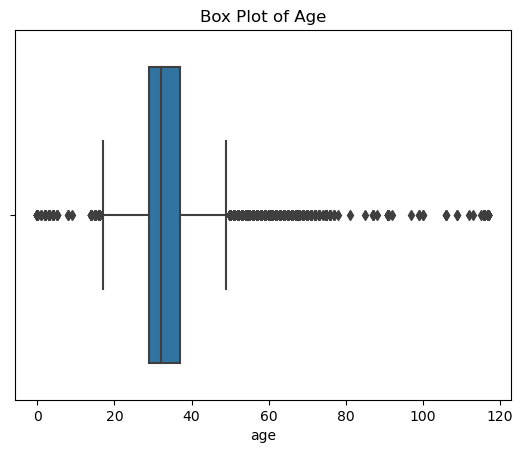

In [18]:
sns.boxplot(x='age', data=df)
plt.title('Box Plot of Age')
plt.show()

<Axes: xlabel='age'>

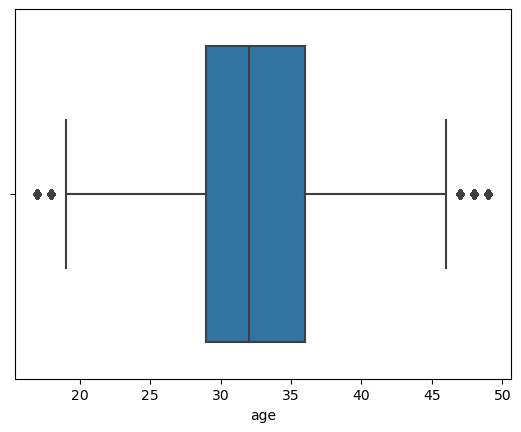

In [19]:
# Calculate the IQR (Interquartile Range)

Q1 = df['age'].quantile(0.25)
Q2 = df['age'].quantile(0.50)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

df.loc[( df['age'] < (Q1 - 1.5 * IQR) ) | ( df['age'] > (Q3 + 1.5 * IQR) ),'age'] = Q2

sns.boxplot(x='age', data=df)



## 11. Check the distribution of the different categories in the column 'rented for' using appropriate plot. (2)

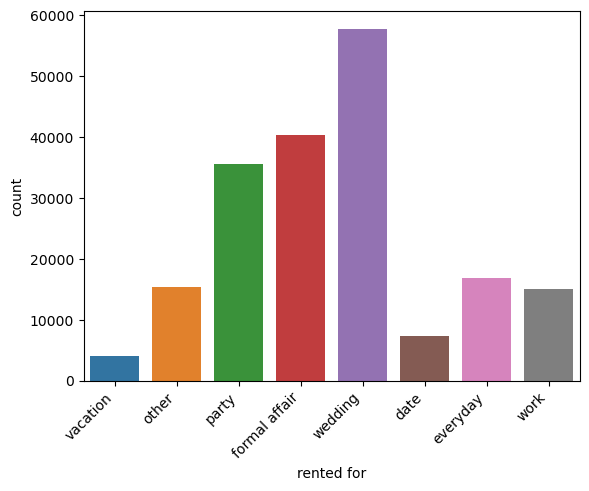

In [20]:

sns.countplot(x='rented for', data=df)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


# Data Preparation for model building: [Score: 2 point]

## 12. Encode the categorical variables in the dataset. (1)

In [21]:
# keeping copy of df before encoding
dfc = df.copy()
dfc.head()


,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,137.0,10.0,vacation,hourglass,romper,68.0,14,28.0
1,fit,34b,132.0,10.0,other,straight & narrow,gown,66.0,12,36.0
2,fit,NA,135.0,10.0,party,NA,sheath,64.0,4,32.0
3,fit,34c,135.0,8.0,formal affair,pear,dress,65.0,8,34.0
4,fit,34b,145.0,10.0,wedding,athletic,gown,69.0,12,27.0


In [22]:
# Encoding categorical columns using LabelEncoder()

categorical_columns = ['fit', 'bust size','rented for', 'body type', 'category']
le = LabelEncoder()

for col in categorical_columns:
    df[col] = le.fit_transform( df[col] )

df.sample(5)

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
149981,0,106,135.0,8.0,2,3,20,65.0,39,32.0
49736,0,38,155.0,10.0,1,5,16,66.0,16,42.0
103620,0,22,125.0,10.0,6,0,16,65.0,1,31.0
36277,0,65,180.0,10.0,6,4,16,64.0,32,44.0
92938,0,26,117.0,8.0,6,4,16,63.0,8,27.0


In [23]:
## Checking whether all columns changed to numeric datatypes(int/float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   fit         192544 non-null  int32  
 1   bust size   192544 non-null  int32  
 2   weight      192544 non-null  float64
 3   rating      192544 non-null  float64
 4   rented for  192544 non-null  int32  
 5   body type   192544 non-null  int32  
 6   category    192544 non-null  int32  
 7   height      192544 non-null  float64
 8   size        192544 non-null  int64  
 9   age         192544 non-null  float64
dtypes: float64(4), int32(5), int64(1)
memory usage: 11.0 MB


## 13. Standardize the data, so that the values are within a particular range. (1)

In [24]:
# keeping a copy of the ecnoded data before standardizing

dfc_2 = df.copy()

In [25]:
numeric_cols = df.select_dtypes(include=['int32','int64','float64']).columns
print(numeric_cols)
ss = StandardScaler()
scaled_df = pd.DataFrame(ss.fit_transform(df), columns=numeric_cols)
scaled_df.head()

Index(['fit', 'bust size', 'weight', 'rating', 'rented for', 'body type',
       'category', 'height', 'size', 'age'],
      dtype='object')


,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,-0.556291,-0.295959,-0.000957,0.634498,0.514420,0.178145,1.569310,1.139905,0.206575,-0.782912
1,-0.556291,-0.384988,-0.249202,0.634498,-0.456753,1.763791,-0.307247,0.387367,-0.028862,0.571310
2,-0.556291,2.686512,-0.100255,0.634498,0.028833,-1.936050,1.647500,-0.365171,-0.970608,-0.105801
3,-0.556291,-0.340473,-0.100255,-0.764242,-0.942340,0.706694,-0.620006,0.011098,-0.499735,0.232754
4,-0.556291,-0.384988,0.396235,0.634498,1.000007,-0.878953,-0.307247,1.516174,-0.028862,-0.952190


# Principal Component Analysis and Clustering: [ Score: 23 point ]

## 14. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same. (7)

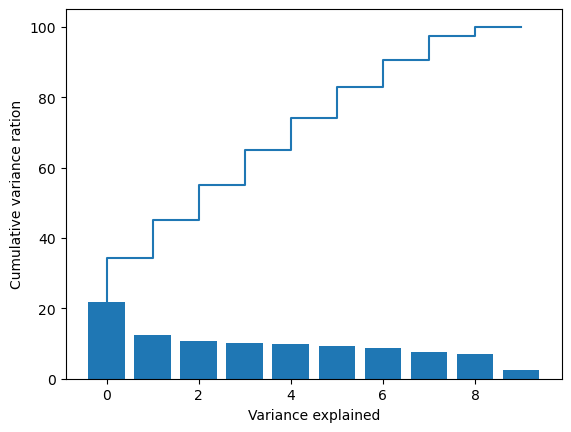

In [26]:
# covariance matrix
cov_matrix = np.cov(scaled_df.T)
cov_matrix

# eig values & eig vectors
eig_values, eig_vectors = np.linalg.eig(cov_matrix)

total = sum(eig_values)

variance_explained = [ (i/total)*100 for i in sorted(eig_values, reverse=True) ]
cumulative_variance_explained = np.cumsum(variance_explained)

#scree plot
plt.bar(range(10),variance_explained)
plt.step(range(10),cumulative_variance_explained)
plt.xlabel("Variance explained")
plt.ylabel("Cumulative variance ration")
plt.show()
    

In [27]:
# pca
pca = PCA(n_components=8)
pca_df = pd.DataFrame( pca.fit_transform(scaled_df),columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'] )
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.094137,-0.853332,0.505184,-1.242269,0.218052,1.666145,0.060447,-0.013923
1,-0.710578,-0.574450,0.618309,0.211693,-1.705321,0.057572,0.467038,-0.118116
2,0.847908,-1.050594,0.849655,0.333661,3.151982,-0.000805,-0.614215,0.122802
3,-0.657773,0.256201,0.447013,-0.024998,-0.941908,-0.816516,-0.045725,0.882799
4,0.562450,-1.225409,-1.167840,-1.206849,-0.057231,0.771396,-0.888632,0.074299


## 15. Apply K-means clustering and segment the data. (You may use original data or PCA transformed data) (8)

### a. Find the optimal K Value using elbow plot for K Means clustering.

Text(0.5, 1.0, 'Elbow Plot')

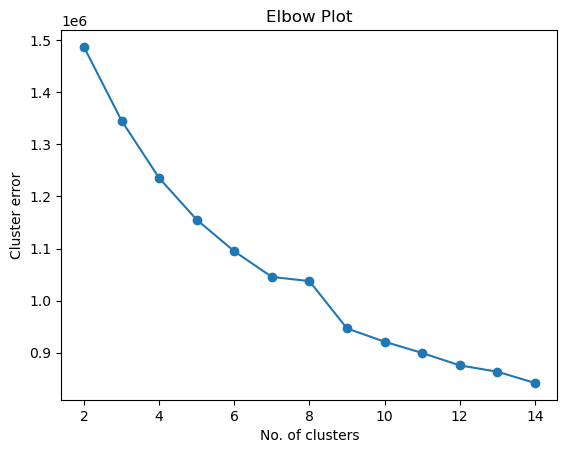

In [28]:
# for k means clustering we have to find out first the optimum value of k
# so we have to plot an elbow plot

cluster_range = range(2,15)
cluster_errors = []
for i in cluster_range:
    cluster = KMeans(n_clusters=i,random_state=100)
    cluster.fit(pca_df)
    cluster_errors.append(cluster.inertia_)

cluster_df = pd.DataFrame({'num_clusters':cluster_range, 'cluster_errors':cluster_errors})

plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'], marker='o')
plt.xlabel("No. of clusters")
plt.ylabel("Cluster error")
plt.title('Elbow Plot')



- From the elbow plot plot it appears that the optimal value of K = 4

### b. Build a Kmeans clustering model using the obtained optimal K value from the elbow plot.

In [29]:
kmeans = KMeans(n_clusters=4, random_state=100)
kmeans.fit(pca_df)
labels = kmeans.labels_
labels_df = pd.DataFrame({'Labels':labels})
labels_df.head()

,Labels
0,0
1,2
2,0
3,2
4,2


In [30]:
kmeans_df = pca_df.join(labels_df)
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Labels
0,0.094137,-0.853332,0.505184,-1.242269,0.218052,1.666145,0.060447,-0.013923,0
1,-0.710578,-0.574450,0.618309,0.211693,-1.705321,0.057572,0.467038,-0.118116,2
2,0.847908,-1.050594,0.849655,0.333661,3.151982,-0.000805,-0.614215,0.122802,0
3,-0.657773,0.256201,0.447013,-0.024998,-0.941908,-0.816516,-0.045725,0.882799,2
4,0.562450,-1.225409,-1.167840,-1.206849,-0.057231,0.771396,-0.888632,0.074299,2


<Axes: xlabel='PC1', ylabel='PC2'>

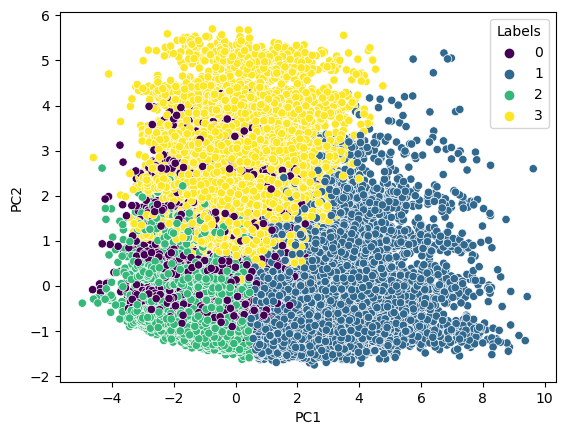

In [31]:
sns.scatterplot(x='PC1', y='PC2', data=kmeans_df, hue='Labels', palette='viridis')

### c. Compute silhouette score for evaluating the quality of the K Means clustering technique.

In [37]:
from sklearn.metrics import silhouette_score

pca_df_30k = pca_df.head(5000)

In [38]:
# Getting the Silhouette scores for Agglomorative clustering



# print("Cluster ----- Silhouette Score")
for i in range(2,15):
    kmeans = KMeans(n_clusters=i, random_state=100)
    kmeans_model = kmeans.fit(pca_df_30k)
    labels = kmeans.predict(pca_df_30k)
    print(i, " => ", silhouette_score(pca_df_30k,labels))


2  =>  0.14109021677593206
3  =>  0.1491231955661418
4  =>  0.1500497431655967
5  =>  0.12354902733332679
6  =>  0.1171761144363306
7  =>  0.11742103655800397
8  =>  0.11789395514111436
9  =>  0.11397274121757034
10  =>  0.11376489437376361
11  =>  0.11326297486192662
12  =>  0.1229978214679723
13  =>  0.1238192236840911
14  =>  0.1215172344861634


## 16. Apply Agglomerative clustering and segment the data. (You may use original data or PCA transformed data) (8)

### a. Find the optimal K Value using dendrogram for Agglomerative clustering.

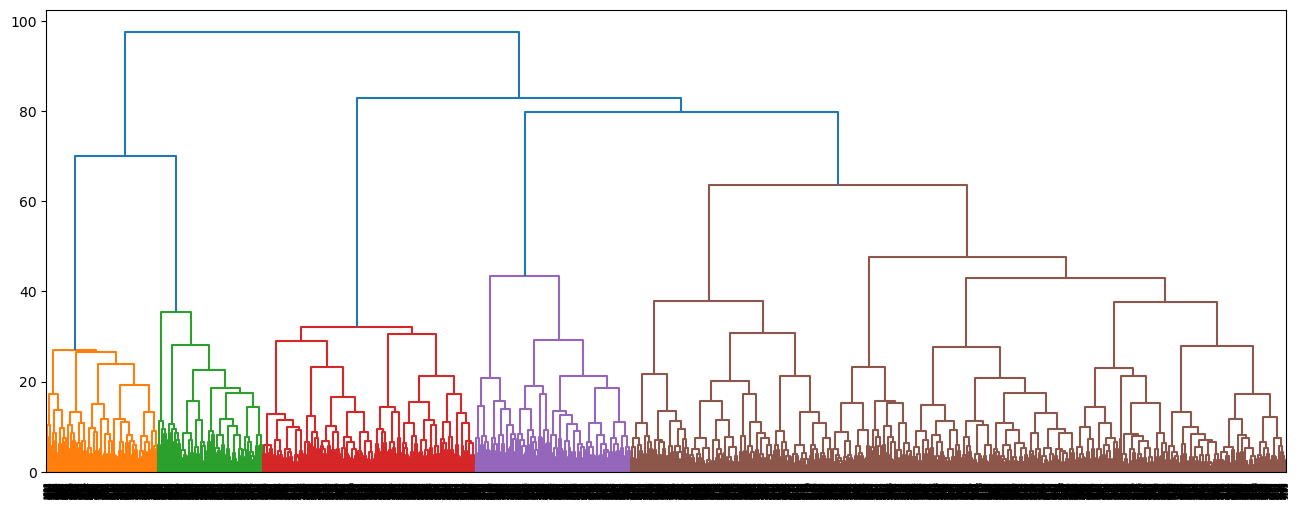

In [41]:
# Drawing the dendrogram for Agglomerative clustering

scaled_df_30k = scaled_df.head(5000)

plt.figure(figsize=(16,6))

merge = linkage(scaled_df_30k, method='ward')
dendrogram(merge, leaf_rotation=90)

plt.show()

### b. Build a Agglomerative clustering model using the obtained optimal K value observed from dendrogram.

In [42]:
## Building hierarchical clustering model using the optimal clusters size as 3 using original data

hie_cluster = AgglomerativeClustering(n_clusters=4, linkage='ward')
hie_cluster_model = hie_cluster.fit(scaled_df_30k)

## Creating a dataframe of the labels
hie_cluster_df = pd.DataFrame({'Labels':hie_cluster.labels_})

hie_cluster_df.head(5)

,Labels
0,2
1,1
2,0
3,1
4,1


In [43]:
df_hier = dfc.head(5000).join(hie_cluster_df)
df_hier.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age,Labels
0,fit,34d,137.0,10.0,vacation,hourglass,romper,68.0,14,28.0,2
1,fit,34b,132.0,10.0,other,straight & narrow,gown,66.0,12,36.0,1
2,fit,NA,135.0,10.0,party,NA,sheath,64.0,4,32.0,0
3,fit,34c,135.0,8.0,formal affair,pear,dress,65.0,8,34.0,1
4,fit,34b,145.0,10.0,wedding,athletic,gown,69.0,12,27.0,1


### c. Compute silhouette score for evaluating the quality of the Agglomerative clustering technique. (Hint: Take a sample of the dataset for agglomerative clustering to reduce the computational time)

In [44]:
# Getting the Silhouette scores for Agglomorative clustering

from sklearn.metrics import silhouette_score
for i in range(2,25):
    hier = AgglomerativeClustering(n_clusters=i)
    hier_model = hier.fit(scaled_df_30k)
    labels = hier.fit_predict(scaled_df_30k)
    print(i, " => ", silhouette_score(scaled_df_30k,labels))



2  =>  0.18444208724426187
3  =>  0.11697398113394739
4  =>  0.12507090348754688
5  =>  0.13766890823541264
6  =>  0.10105577497587921
7  =>  0.08712700024464898
8  =>  0.08996661263828437
9  =>  0.06981104865925297
10  =>  0.06883469105638186
11  =>  0.06218720968469454
12  =>  0.06447157222582985
13  =>  0.066810476732039
14  =>  0.060813467923772145
15  =>  0.06490225490721314
16  =>  0.0660086944337834
17  =>  0.06542375782411404
18  =>  0.06836586769271251
19  =>  0.05472963916954393
20  =>  0.05577183765067907
21  =>  0.05898355251012382
22  =>  0.061758839168466466
23  =>  0.06093653195446955
24  =>  0.06213090273264941


In [45]:
## Building hierarchical clustering model using the optimal clusters size as 4 using original data

hie_cluster = AgglomerativeClustering(n_clusters=4, linkage='ward')
hie_cluster_model = hie_cluster.fit(scaled_df_30k)

## Creating a dataframe of the labels
hie_cluster_df = pd.DataFrame({'Labels':hie_cluster.labels_})

hie_cluster_df.head(5)


,Labels
0,2
1,1
2,0
3,1
4,1


In [46]:
## joining the label dataframe with unscaled initial cleaned dataframe.(dfc)

hier_df = dfc.join(hie_cluster_df)
hier_df.head()


,fit,bust size,weight,rating,rented for,body type,category,height,size,age,Labels
0,fit,34d,137.0,10.0,vacation,hourglass,romper,68.0,14,28.0,2.0
1,fit,34b,132.0,10.0,other,straight & narrow,gown,66.0,12,36.0,1.0
2,fit,NA,135.0,10.0,party,NA,sheath,64.0,4,32.0,0.0
3,fit,34c,135.0,8.0,formal affair,pear,dress,65.0,8,34.0,1.0
4,fit,34b,145.0,10.0,wedding,athletic,gown,69.0,12,27.0,1.0


## Conclusion : [ Score: 2 point ]

### 17. Perform cluster analysis by doing bivariate analysis between cluster labels and different features and write your conclusion on the results. (2)

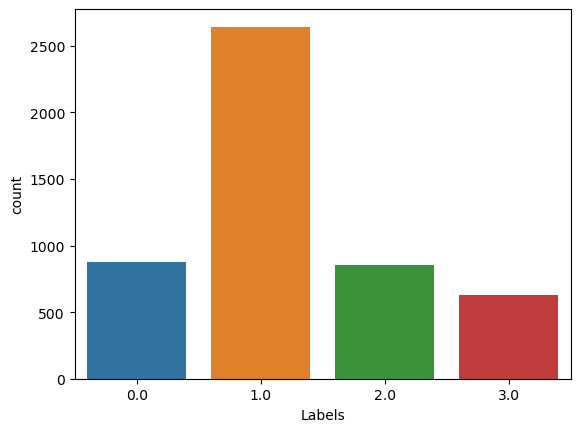

In [47]:
sns.countplot(x='Labels',data=hier_df)
plt.show()

<Axes: xlabel='Labels', ylabel='weight'>

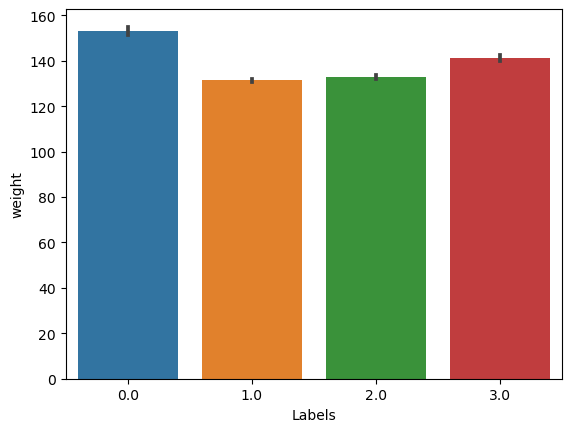

In [49]:
sns.barplot(x='Labels', y='weight', data=hier_df )

<Axes: xlabel='Labels', ylabel='size'>

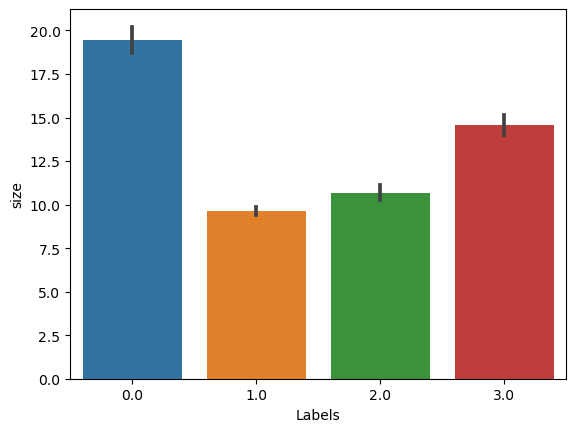

In [51]:
sns.barplot(x='Labels', y='size', data=hier_df )

<Axes: xlabel='Labels', ylabel='bust size'>

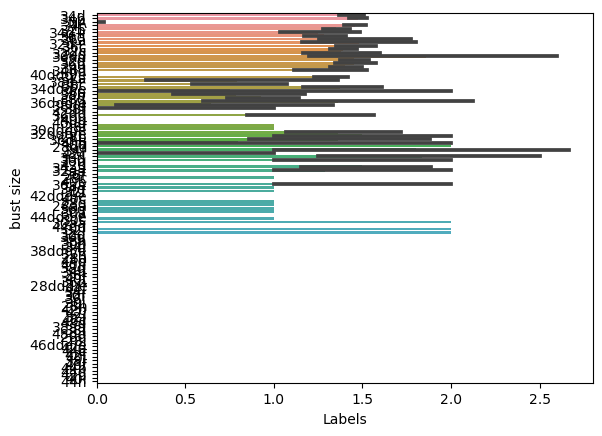

In [53]:
sns.barplot(x='Labels', y='bust size', data=hier_df )